In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/MACHINE LEARNING/data_predic_c45.xlsx")
df.head()

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Aktivitas_Beg1ng,Aktivitas_Olahraga,Pen1kit_Bawaan,Hasil
0,1,1,1,0,0,1,1,0,Ya
1,2,1,1,1,0,1,0,1,Tidak
2,3,0,1,1,0,1,0,0,Tidak
3,4,1,1,1,1,0,0,1,Tidak
4,5,0,0,0,1,0,1,1,Ya


Text(0, 0.5, 'Merokok')

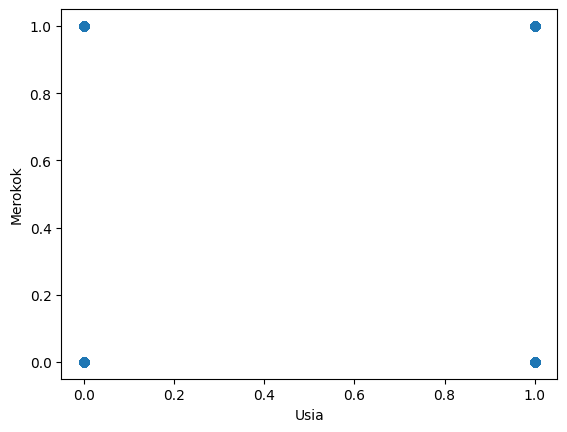

In [ ]:
plt.scatter(df.Usia,df['Merokok'])
plt.xlabel('Usia')
plt.ylabel('Merokok')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Usia','Merokok']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 0, ..., 2, 1, 1], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Aktivitas_Beg1ng,Aktivitas_Olahraga,Pen1kit_Bawaan,Hasil,cluster
0,1,1,1,0,0,1,1,0,0,1
1,2,1,1,1,0,1,0,1,1,2
2,3,0,1,1,0,1,0,0,2,0
3,4,1,1,1,1,0,0,1,1,2
4,5,0,0,0,1,0,1,1,0,1


In [ ]:
km.cluster_centers_

array([[ 3.31956684e-14,  1.00000000e+00],
       [ 3.40027045e-01, -3.84137167e-14],
       [ 1.00000000e+00,  1.00000000e+00]])

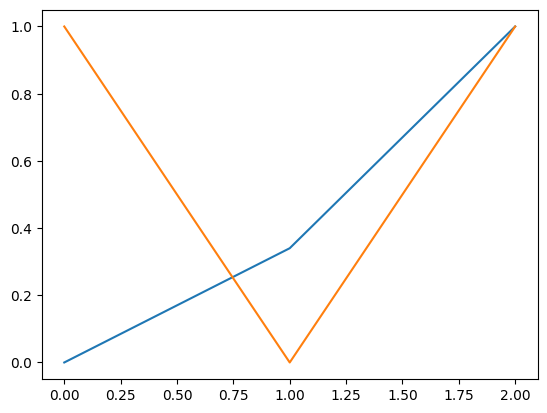

In [ ]:
plt.plot(km.cluster_centers_)

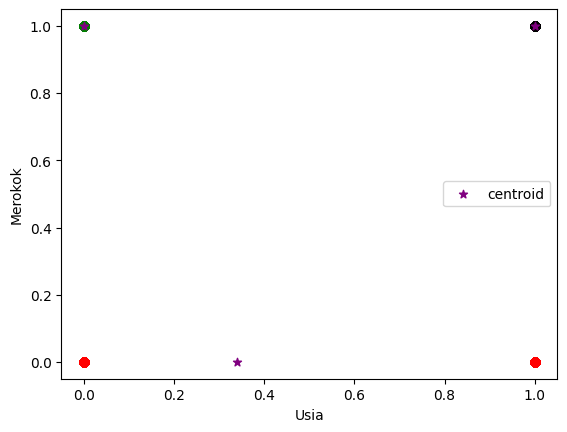

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Usia,df1['Merokok'],color='green')
plt.scatter(df2.Usia,df2['Merokok'],color='red')
plt.scatter(df3.Usia,df3['Merokok'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Usia')
plt.ylabel('Merokok')
plt.legend()

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Merokok']])
df['Merokok'] = scaler.transform(df[['Merokok']])

scaler.fit(df[['Usia']])
df['Usia'] = scaler.transform(df[['Usia']])

In [ ]:
df.head()

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Aktivitas_Beg1ng,Aktivitas_Olahraga,Pen1kit_Bawaan,Hasil,cluster
0,1,1.0,1,0.0,0,1,1,0,0,1
1,2,1.0,1,1.0,0,1,0,1,1,2
2,3,0.0,1,1.0,0,1,0,0,2,0
3,4,1.0,1,1.0,1,0,0,1,1,2
4,5,0.0,0,0.0,1,0,1,1,0,1


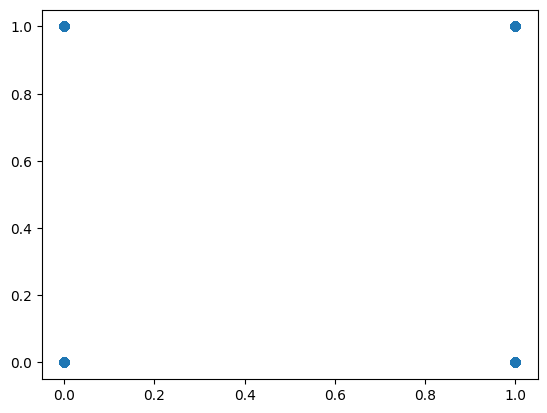

In [ ]:
plt.scatter(df.Usia,df['Merokok'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Usia','Merokok']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 0, ..., 2, 1, 1], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Aktivitas_Beg1ng,Aktivitas_Olahraga,Pen1kit_Bawaan,Hasil,cluster
0,1,1.0,1,0.0,0,1,1,0,0,1
1,2,1.0,1,1.0,0,1,0,1,1,2
2,3,0.0,1,1.0,0,1,0,0,2,0
3,4,1.0,1,1.0,1,0,0,1,1,2
4,5,0.0,0,0.0,1,0,1,1,0,1


In [ ]:
km.cluster_centers_

array([[ 3.31956684e-14,  1.00000000e+00],
       [ 3.40027045e-01, -3.84137167e-14],
       [ 1.00000000e+00,  1.00000000e+00]])

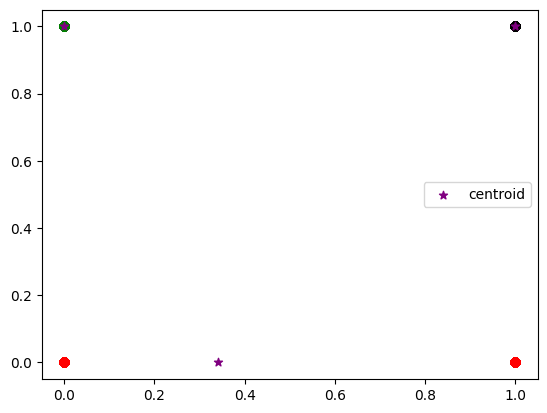

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Usia,df1['Merokok'],color='green')
plt.scatter(df2.Usia,df2['Merokok'],color='red')
plt.scatter(df3.Usia,df3['Merokok'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Usia','Merokok']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

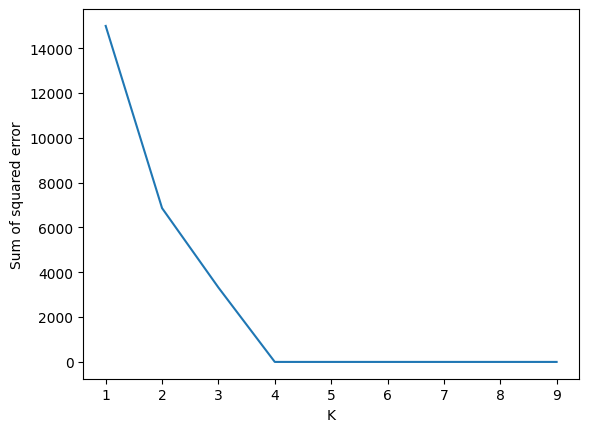

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)